# Importing all the Necessary Libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [93]:
Train_data = pd.read_csv('Google_Stock_Price_Train.csv')
Train_data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [94]:
Train_data.shape

(1258, 6)

In [95]:
Train_data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [96]:
X = Train_data.iloc[:,1:2]

In [97]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()

In [98]:
X = MMS.fit_transform(X)

In [99]:
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(X[i-60:i,0])
    y_train.append(X[i,0])



In [100]:
x_train = np.array(x_train)
x_train.shape

(1198, 60)

In [101]:
y_train = np.array(y_train)

In [102]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [103]:
x_train.shape

(1198, 60, 1)

In [104]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [105]:
Regressor = Sequential()
Regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
Regressor.add(Dropout(rate=0.2))
Regressor.add(LSTM(units=50,return_sequences=True))
Regressor.add(Dropout(rate=0.2))
Regressor.add(LSTM(units=50,return_sequences=True))
Regressor.add(Dropout(rate=0.2))

In [106]:
Regressor.add(LSTM(units=50))
Regressor.add(Dropout(rate=0.2))
Regressor.add(Dense(units=1))

In [107]:
Regressor.compile(optimizer='adam', loss='mean_squared_error')

In [108]:
Regressor.fit(x_train,y_train, epochs=200,batch_size=32)

Epoch 1/200
38/38 [==============================] - 14s 124ms/step - loss: 0.0415
Epoch 2/200
38/38 [==============================] - 6s 150ms/step - loss: 0.0062
Epoch 3/200
38/38 [==============================] - 7s 182ms/step - loss: 0.0058
Epoch 4/200
38/38 [==============================] - 6s 164ms/step - loss: 0.0052
Epoch 5/200
38/38 [==============================] - 6s 150ms/step - loss: 0.0052
Epoch 6/200
38/38 [==============================] - 7s 179ms/step - loss: 0.0051
Epoch 7/200
38/38 [==============================] - 7s 180ms/step - loss: 0.0051
Epoch 8/200
38/38 [==============================] - 6s 154ms/step - loss: 0.0044
Epoch 9/200
38/38 [==============================] - 6s 151ms/step - loss: 0.0051
Epoch 10/200
38/38 [==============================] - 6s 145ms/step - loss: 0.0041
Epoch 11/200
38/38 [==============================] - 5s 133ms/step - loss: 0.0041
Epoch 12/200
38/38 [==============================] - 5s 133ms/step - loss: 0.0037
Epoch 13/200

In [109]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
test_data

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [110]:
test_data.shape

(20, 6)

In [111]:
Real_stock_price = test_data.iloc[:,1:2].values

In [112]:
Real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [113]:
#  Adding more rows 
Total_data = pd.concat((Train_data['Open'],test_data['Open']),axis=0)

In [114]:
Total_data.shape

(1278,)

In [115]:
inputs = Total_data[len(Total_data)-len(test_data)-60:].values

In [116]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [117]:
inputs = inputs.reshape(-1,1)

In [118]:
inputs.shape

(80, 1)

In [119]:
inputs = MMS.transform(inputs)

c:\Users\navee\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [120]:
inputs[0]

array([0.9299055])

In [121]:
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)

In [122]:
x_test.shape

(20, 60)

In [123]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [124]:
x_test.shape

(20, 60, 1)

In [125]:
predicted_stock_price = Regressor.predict(x_test)

1/1 [==============================] - 4s 4s/step


In [126]:
predicted_stock_price

array([[0.9129458 ],
       [0.9100896 ],
       [0.92136496],
       [0.91991615],
       [0.928135  ],
       [0.94468015],
       [0.9475516 ],
       [0.94221   ],
       [0.94604826],
       [0.9500507 ],
       [0.9500314 ],
       [0.94842935],
       [0.94821095],
       [0.95131254],
       [0.9523927 ],
       [0.97136223],
       [0.9832964 ],
       [0.9918343 ],
       [0.98873055],
       [0.96430933]], dtype=float32)

In [127]:
predicted_stock_price = MMS.inverse_transform(predicted_stock_price )

In [128]:
predicted_stock_price

array([[769.8832 ],
       [768.3477 ],
       [774.40894],
       [773.6301 ],
       [778.0482 ],
       [786.94226],
       [788.48584],
       [785.61444],
       [787.6777 ],
       [789.8292 ],
       [789.81885],
       [788.95764],
       [788.8403 ],
       [790.50757],
       [791.0882 ],
       [801.28546],
       [807.7008 ],
       [812.2904 ],
       [810.62195],
       [797.4941 ]], dtype=float32)

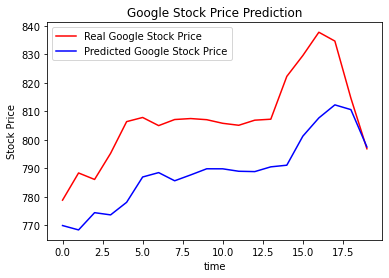

In [129]:
plt.plot(Real_stock_price, color = 'red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()